In [1]:
def get_font_family():
    import platform
    system_name = platform.system()
    
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [2]:
get_font_family()

E: 잠금 파일 /var/lib/dpkg/lock-frontend 파일을 열 수 없습니다 - open (13: 허가 거부)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 81 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: cach

fc-cache: succeeded


'NanumBarunGothic'

In [3]:
# https://financedata.github.io/posts/finance-data-reader-users-guide.html 
!pip install -U finance-datareader

In [4]:
import pandas as pd
import FinanceDataReader as fdr
fdr.__version__

'0.9.33'

In [5]:
stocks_dict = {
    '삼성전자': '005930',
    '현대차': '005380',
    '엔씨소프트': '036570',
    '셀트리온': '068270',
    '한국항공우주': '047810',
    'LG에너지솔루션': '373220',
    '카카오': '035720',
    'S-Oil': '010950',
    '고려아연': '010130',
    '롯데쇼핑': '023530',
    'CJ제일제당':'097950',
    'HMM': '011200',
    '두산에너빌리티': '034020',
    '삼성생명': '032830'
}

In [6]:
type(stocks_dict)

dict

In [7]:
stocks_dict.keys()

dict_keys(['삼성전자', '현대차', '엔씨소프트', '셀트리온', '한국항공우주', 'LG에너지솔루션', '카카오', 'S-Oil', '고려아연', '롯데쇼핑', 'CJ제일제당', 'HMM', '두산에너빌리티', '삼성생명'])

In [8]:
stocks_dict.values()

dict_values(['005930', '005380', '036570', '068270', '047810', '373220', '035720', '010950', '010130', '023530', '097950', '011200', '034020', '032830'])

In [9]:
stocks_list = []
for stock_code in stocks_dict.values():
    cp = fdr.DataReader(stock_code, '2020')['Close']
    stocks_list.append(cp)

In [10]:
cp

Date
2020-01-02    73100
2020-01-03    73300
2020-01-06    72700
2020-01-07    72800
2020-01-08    71600
              ...  
2022-05-30    68700
2022-05-31    68100
2022-06-02    66900
2022-06-03    66400
2022-06-07    65100
Name: Close, Length: 600, dtype: int64

In [11]:
len(stocks_list)

14

In [12]:
df = pd.concat(stocks_list, axis = 1)
df.columns = stocks_dict.keys()
df

,삼성전자,현대차,엔씨소프트,셀트리온,한국항공우주,LG에너지솔루션,카카오,S-Oil,고려아연,롯데쇼핑,CJ제일제당,HMM,두산에너빌리티,삼성생명
Date,,,,,,,,,,,,,,
2020-01-02,55200,118000,541000,173489,33800,NaN,30609,91900,424000,135500,245000,3750,5081,73100
2020-01-03,55500,116000,565000,171079,33950,NaN,30609,93500,425500,132500,241000,3775,5071,73300
2020-01-06,55500,116000,579000,166742,33900,NaN,31010,93400,421500,128500,233500,3835,4921,72700
2020-01-07,55800,115500,594000,171561,33700,NaN,32114,91900,428000,132000,234000,3900,4903,72800
2020-01-08,56800,112000,604000,166742,32450,NaN,32014,88100,435000,128000,229500,3765,4708,71600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-30,67700,187500,456000,157000,51800,439500.0,83900,112500,581000,100000,394500,31950,20250,68700
2022-05-31,67400,189500,455000,160500,52500,444000.0,85000,116000,595000,101500,393500,32450,20750,68100
2022-06-02,66700,187500,456000,157500,52900,440500.0,83700,115000,585000,98500,397500,30850,20200,66900


In [13]:
# https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.rc.html
import matplotlib.pyplot as plt
font_family = get_font_family()
plt.rc('font', family=font_family)
plt.rc('axes', unicode_minus=False)
plt.style.use('ggplot')

E: 잠금 파일 /var/lib/dpkg/lock-frontend 파일을 열 수 없습니다 - open (13: 허가 거부)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
/usr/share/fonts: caching, new cache contents: 0 fonts, 6 dirs
/usr/share/fonts/X11: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/X11/Type1: caching, new cache contents: 81 fonts, 0 dirs
/usr/share/fonts/X11/encodings: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/X11/encodings/large: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/X11/misc: caching, new cache contents: 89 fonts, 0 dirs
/usr/share/fonts/X11/util: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cmap/adobe-cns1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-gb1: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts/cmap/adobe-japan1: cach

fc-cache: succeeded


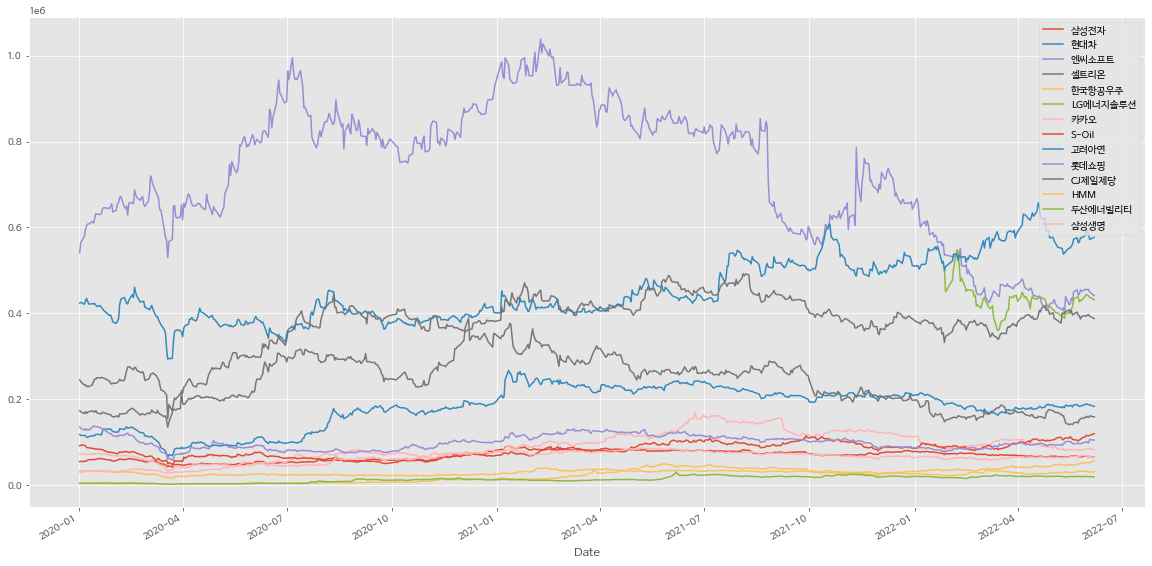

In [14]:
g = df.plot(figsize=(20, 10))

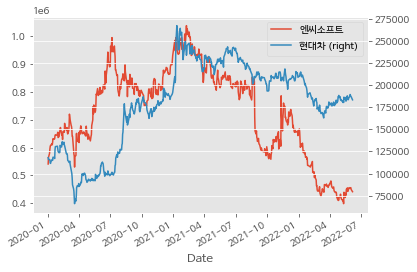

In [15]:
g = df[['엔씨소프트', '현대차']].plot(secondary_y='현대차')

In [16]:
import numpy as np
df2 = df[['엔씨소프트', '현대차']]
log_ret = np.log(df2).diff(1).dropna()
log_ret.tail(10)

,엔씨소프트,현대차
Date,,
2022-05-23,0.011050,0.008011
2022-05-24,-0.027857,-0.016086
2022-05-25,0.004510,-0.008141
2022-05-26,0.022248,0.002721
2022-05-27,-0.007731,0.008119
2022-05-30,0.011025,0.010724
2022-05-31,-0.002195,0.010610
2022-06-02,0.002195,-0.010610
2022-06-03,-0.014357,-0.002670


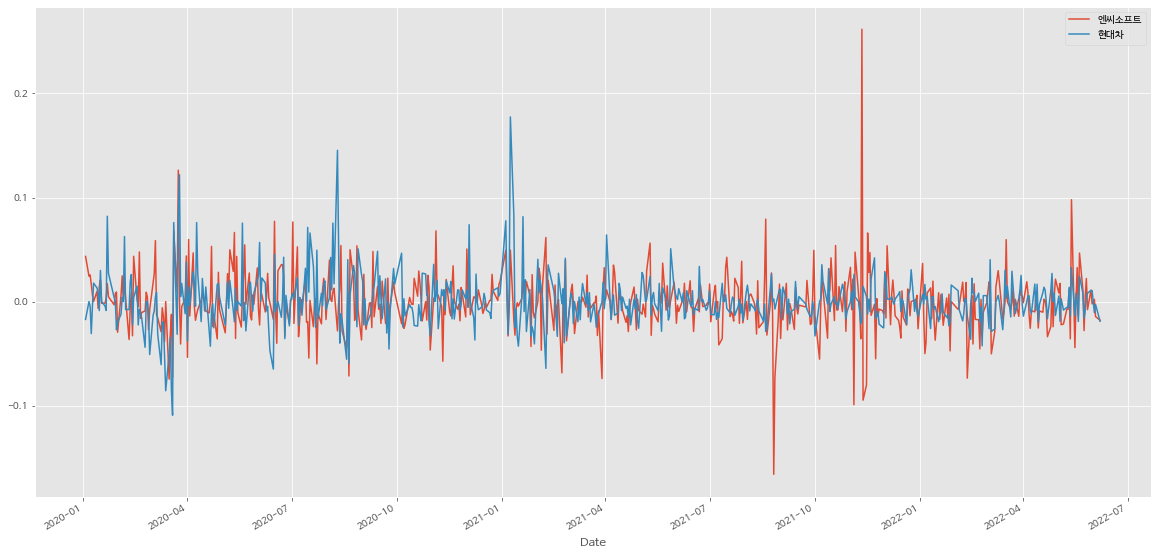

In [17]:
g = log_ret.plot(figsize=(20, 10))

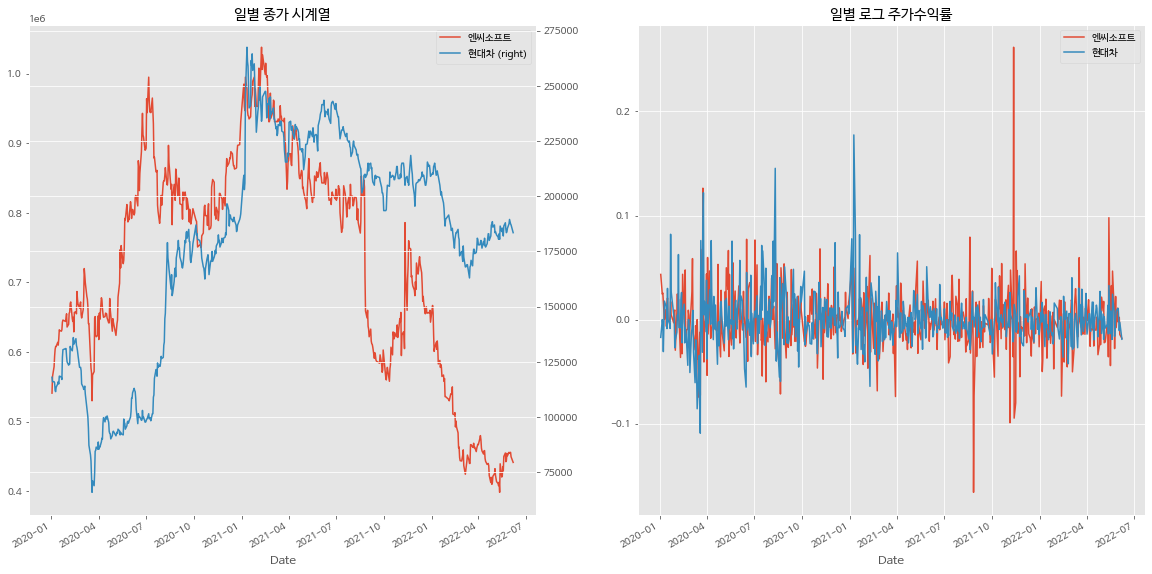

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
g = df[['엔씨소프트', '현대차']].plot(secondary_y='현대차', ax=axes[0], title='일별 종가 시계열')
g = log_ret.plot(ax=axes[1], title = "일별 로그 주가수익률")

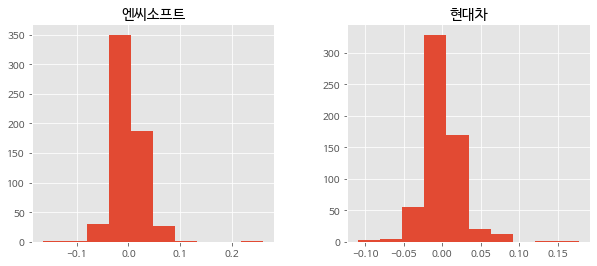

In [19]:
h = log_ret.hist(figsize=(10, 4))

In [20]:
df2.describe()

,엔씨소프트,현대차
count,6.000000e+02,600.000000
mean,7.308592e+05,179884.000000
std,1.580844e+05,48260.672722
min,3.985000e+05,65900.000000
25%,6.235000e+05,146375.000000
50%,7.835000e+05,186250.000000
75%,8.472500e+05,215500.000000
max,1.038000e+06,267500.000000


In [21]:
log_ret_all = np.log(df).diff(1).dropna()
log_ret_all.tail()

,삼성전자,현대차,엔씨소프트,셀트리온,한국항공우주,LG에너지솔루션,카카오,S-Oil,고려아연,롯데쇼핑,CJ제일제당,HMM,두산에너빌리티,삼성생명
Date,,,,,,,,,,,,,,
2022-05-30,0.017884,0.010724,0.011025,0.006390,0.009699,0.020690,0.026572,0.022473,0.008643,0.019183,0.003810,-0.054808,0.004951,-0.015885
2022-05-31,-0.004441,0.010610,-0.002195,0.022048,0.013423,0.010187,0.013026,0.030637,0.023811,0.014889,-0.002538,0.015528,0.024391,-0.008772
2022-06-02,-0.010440,-0.010610,0.002195,-0.018868,0.007590,-0.007914,-0.015412,-0.008658,-0.016950,-0.030002,0.010114,-0.050564,-0.026864,-0.017778
2022-06-03,0.001498,-0.002670,-0.014357,0.025080,-0.011407,-0.006834,0.023614,0.008658,-0.022473,0.078088,-0.010114,0.012883,-0.014963,-0.007502
2022-06-07,-0.019653,-0.018894,-0.017958,-0.015601,0.084299,-0.012651,-0.045354,0.033902,0.008703,-0.014185,-0.014076,-0.014505,-0.017744,-0.019773


In [22]:
log_ret_all.skew()

삼성전자        0.714664
현대차        -0.041834
엔씨소프트       0.607198
셀트리온        0.040368
한국항공우주      0.305004
LG에너지솔루션   -0.429805
카카오         0.185451
S-Oil       0.095144
고려아연       -0.168206
롯데쇼핑        0.889239
CJ제일제당      0.176290
HMM         0.670217
두산에너빌리티     0.373111
삼성생명        0.060308
dtype: float64

In [23]:
log_ret_all.kurt()

삼성전자        0.717713
현대차         0.128537
엔씨소프트       3.833899
셀트리온        1.473515
한국항공우주      1.495049
LG에너지솔루션    2.380429
카카오         1.472365
S-Oil      -0.240545
고려아연        0.150219
롯데쇼핑        2.161718
CJ제일제당      0.552026
HMM         2.621856
두산에너빌리티     2.977747
삼성생명       -0.185350
dtype: float64